In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Arial'

In [3]:
def seqDist(s1, s2):
    return sum([0 if b1 == b2 else 1 for b1, b2 in zip(s1, s2)])

In [4]:
df_init = pd.read_csv('/home/kurfurst/Documents/datasets/KS_CDP_round0.tsv', sep='\t', names=['count', 'seq'])
df_select = pd.read_csv('/home/kurfurst/Documents/datasets/MV_MUP_full_FAcounts.tsv', sep='\t', names=['count', 'seq'])

In [5]:
supernova_core = 'GGAAGAGAATATCCCCGGGGAGTGACTTGGGATGGGGG'
supernova_full = 'GGAAGAGATGGCGACGACACAGGGACGATGCCGAATATCCTCAGTGCGCAGGGCCGCAGGGGGGAGTGACTTGGGATGGGGGGTC'
supernova_core_pos = [1,2,3,4,5,6,33,34,35,36,37,38,39,40,41,42,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82]
supernova_core_pos_0based = [x-1 for x in supernova_core_pos]

In [6]:
df_init.head()

,count,seq
0,8,GGAAGAAATTTCGATAACTTATAGCAGATGCCGAGCTTGCGCAGGG...
1,8,GCGAGAACTGGCGTCTTCCGAGGCATTATTGCAAAATTCCTCAGCT...
2,8,TGAAGATATGGCGACGACACAGGAACGATGCTGGATTTCCTCACTG...
3,7,GGACTAGATGGCGACAATCTGGGCTTGATGCAGCATATCCGCAGTG...
4,7,CGAAGAGATGGCGACATCACACAAGATATGTCGAAAACCCCTAGTT...


In [7]:
# Extracting core positions

df_init['core'] = [''.join([s[x] for x in supernova_core_pos_0based]) for s in df_init['seq']]
df_select['core'] = [''.join([s[x] for x in supernova_core_pos_0based]) for s in df_select['seq']]

In [8]:
df_init.head()

,count,seq,core
0,8,GGAAGAAATTTCGATAACTTATAGCAGATGCCGAGCTTGCGCAGGG...,GGAAGAGAGCTTGCGCAGGGAGAGCCTTGTGATGTGAC
1,8,GCGAGAACTGGCGTCTTCCGAGGCATTATTGCAAAATTCCTCAGCT...,GCGAGAAAAATTCCTCGATGATTGCCTCTGTATGGCGG
2,8,TGAAGATATGGCGACGACACAGGAACGATGCTGGATTTCCTCACTG...,TGAAGAGGATTTCCTCCCGGGTCGAGCCGGGTTCGGCA
3,7,GGACTAGATGGCGACAATCTGGGCTTGATGCAGCATATCCGCAGTG...,GGACTAGCATATCCGCGGCGTATAATTTGATAATGGGG
4,7,CGAAGAGATGGCGACATCACACAAGATATGTCGAAAACCCCTAGTT...,CGAAGAGAAAACCCCTCGGCAGAAATCGGCGTTTGCGG


In [9]:
df_select.head()

,count,seq,core
0,219442,GGAAGAGATGGCTACTACCAAGCTACGTGGCCTAATATCATCATGG...,GGAAGATAATATCATCAAGTAAGACGTTGGAATGGCGC
1,130734,GGAGGAGATGAAGACGTCCGCGGCCCAAGCTCGTCTATGCTCAATG...,GGAGGAGTCTATGCTCGTCGATTTAGTTGCGACGCGTG
2,130647,GGAAGAGAGCGTGCCGTCAGACAGATGAAACTGAAACACCTCAGTG...,GGAAGAGAAACACCTCGGGCTGTGACCCCCTATGACGG
3,110797,GGAAGAGATGTAGACAAGGCAGGCCCCATTCCTTGCATACTTAGTG...,GGAAGATTGCATACTTGGGCAGTAACTAGGGATGGAGT
4,105729,GGTAGAGAGGACGACGGCCCCGGAAGATTTCTGAATATCCTCCGTG...,GGTAGAGAATATCCTCGGGGATTTAGTTTCGATGGAGC


In [10]:
# Computing distances from full supernova

df_init['full_sn_Dist'] = [seqDist(s, supernova_full) for s in df_init['seq']]
df_select['full_sn_Dist'] = [seqDist(s, supernova_full) for s in df_select['seq']]

In [11]:
# Computing distances from core supernova

df_init['core_sn_Dist'] = [seqDist(s, supernova_core) for s in df_init['core']]
df_select['core_sn_Dist'] = [seqDist(s, supernova_core) for s in df_select['core']]

In [12]:
# 

vc_init_full = df_init['full_sn_Dist'].head(len(df_select)).value_counts()
vc_select_full = df_select['full_sn_Dist'].value_counts()

vc_init_core = df_init['core_sn_Dist'].head(len(df_select)).value_counts()
vc_select_core = df_select['core_sn_Dist'].value_counts()

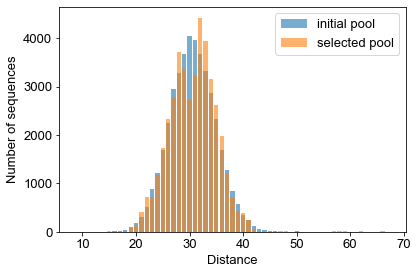

In [13]:
a = 0.6
plt.bar(vc_init_full.index, vc_init_full.values, alpha=a, label='initial pool')
plt.bar(vc_select_full.index, vc_select_full.values, alpha=a, label='selected pool')
plt.xlabel('Distance')
plt.ylabel('Number of sequences')
plt.legend()
plt.tight_layout()
plt.savefig('fig2c.png', dpi=180)

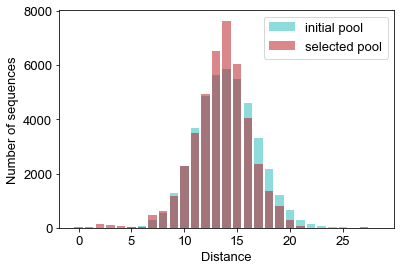

In [22]:
a = 0.5
plt.bar(vc_init_core.index, vc_init_core.values, alpha=a, label='initial pool', color='#1cb8b8')
plt.bar(vc_select_core.index, vc_select_core.values, alpha=a, label='selected pool', color='#b51019')
plt.xlabel('Distance')
plt.ylabel('Number of sequences')
plt.legend()
plt.tight_layout
plt.savefig('fig2c_core.png', dpi=180)

In [15]:
df_select.columns

Index(['count', 'seq', 'core', 'full_sn_Dist', 'core_sn_Dist'], dtype='object')

In [16]:
df_select[df_select['core_sn_Dist'] < 5]

,count,seq,core,full_sn_Dist,core_sn_Dist
35,28418,GGCAGAGATGGCAACGTCAACATGAGGATGCCGCATATCCCCAGTG...,GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG,20,2
136,3139,GGAAGACATGGGGACAACGGTCCCATATAACAGAATAGCCCCCAGG...,GGAAGAGAATAGCCCCGGGGAGTGACTTGGTATGGAGC,32,4
359,563,GGAAGATATGGCGCGAACAAATGGACAATGCCGAATATCCCCCGCA...,GGAAGAGAATATCCCCGGGGAGTGACTTGGGATGGGGG,16,0
777,111,GGAAGAGATGGCAACGTCAACATGAGGATGCCGCATATCCCCAGTG...,GGAAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG,19,1
1137,55,GGCAGAGATGGCAACGTCAACATGAGGATGCCGCATATCCCCAGTG...,GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG,21,2
...,...,...,...,...,...
42020,1,GGAAGACATGGGGACAACGGTCCCATATAACAGAATAGCCCCCTGG...,GGAAGAGAATAGCCCCGGGGAGTGACTTGGTATGGAGC,32,4
42224,1,GGCAGAGATGGCAACGTCAACATGAGGATGCCGCATATCCCCACTG...,GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG,21,2
42366,1,GGCAGAGATGGCAACGTCAACATGAGGATGCCGCATATCCCCAGTG...,GGCAGAGCATATCCCCGGGGAGTGACTTGGGCTGGGGA,20,4
42527,1,GTCAGAGATGGCAACGTCAACATGAGGATGCCGCATATCCCCAGTG...,GTCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG,22,3


In [18]:
def colorprint2(xs):
    
    if type(xs) == list:
        stclen = len(xs[0])
    elif type(xs) == str:
        stclen = len(xs)
    else:
        stclen = len(xs.iloc[0])
    
    print('0' + '' .join([str(x)[0] if x%10==0 else ' ' for x in range(2, stclen)]))
            
    for stc in xs:
        for s in stc:
            if s=='A':
                print("\033[42m" + s + "\033[0m", end='')
            elif s=='T':
                print("\033[41m" + s + "\033[0m", end='')
            elif s=='C':
                print("\033[44m" + s + "\033[0m", end='')
            elif s=='G':
                print("\033[40m" + s + "\033[0m", end='')
            
        print('')

In [19]:
colorprint2(df_select[df_select['core_sn_Dist'] < 5]['core'])

0        1         2         3       
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGAAGAGAATAGCCCCGGGGAGTGACTTGGTATGGAGC
GGAAGAGAATATCCCCGGGGAGTGACTTGGGATGGGGG
GGAAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGAAGAGAATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGT
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGTAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGAAGAGAATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGACTTGGGATGGGGG
GGCAGAGCATATCCCCGGGGAGTGAC